In [92]:
import matplotlib.pyplot as plt
import numpy as np

## Experimental data

In [111]:
R = 8.31
rho = 13600
g = 9.8

dd = 0.5 * 0.1 #cm
dt = 0.01

In [122]:
Pshot = np.array([7.585 - 5.85, 7.56 - 5.73, 7.76 - 5.61,
                 7.85 - 5.55, 7.925 - 5.5, 8 - 5.44, 8.1 - 5.32, 8.22 - 5.25, 8.35 - 5.15,
                 8.55 - 4.92, 8.8 - 4.7, 9.2 - 4.345]) # 
Tshot = np.array([23.14, 24, 27, 28, 29, 30, 31, 32, 33, 35, 37, 40])
Tshot = [T+273 for T in Tshot]


Pscold = np.array([8.955 - 4.55, 8.6 - 4.855, 8.38 - 5.05, 8.16 - 5.24,
                  8 - 5.4, 7.83 - 5.55, 7.66 - 5.7])
Tscold = np.array([37, 34, 32, 30, 28, 26, 24])
Tscold = [T+273 for T in Tscold]

In [123]:
Pscold* 10

array([44.05, 37.45, 33.3 , 29.2 , 26.  , 22.8 , 19.6 ])

In [124]:
[np.log(p) for p in Pshot]

[0.5510074133988228,
 0.6043159668533291,
 0.7654678421395712,
 0.8329091229351039,
 0.8858315243894465,
 0.9400072584914709,
 1.0224509277025455,
 1.0885619528146084,
 1.1631508098056806,
 1.2892326482767595,
 1.4109869737102623,
 1.5800091017432882]

## Plots

In [125]:
xh = Tshot
xc = Tscold

yh = Pshot
yc = Pscold

dy = [dd for i in range(len(Tshot))]
dx = [dt for i in range(len(Tshot))]

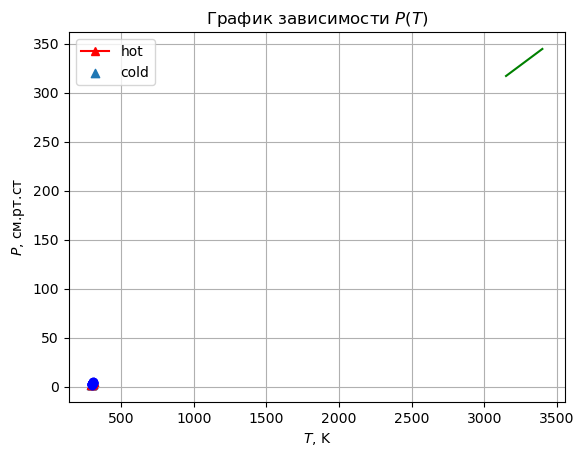

In [126]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
ax.plot(xh, yh, 'r^-')
plt.scatter(xh, yh, marker='^')

model1 = np.poly1d(np.polyfit(xh[:2], yh[:2], 1))
model2 = np.poly1d(np.polyfit(xh[2:4], yh[2:4], 1))
model3 = np.poly1d(np.polyfit(xh[4:6], yh[4:6], 1))
model4 = np.poly1d(np.polyfit(xh[6:8], yh[6:8], 1))
model5 = np.poly1d(np.polyfit(xh[8:10], yh[8:10], 1))
model6 = np.poly1d(np.polyfit(xh[10:12], yh[10:12], 1))
#polyline = np.linspace(294, 315)
plt.plot(polyline, model1(polyline), color = 'green')

ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")

ax.set_title('График зависимости $P (T)$')
plt.grid()

plt.legend (('hot', 'cold'))

plt.xlabel('$T$, K')
plt.ylabel('$P$, см.рт.ст')

plt.show()
#plt.savefig('simpleplot.png')

In [117]:
models = [model1.c[0], (model2.c)[0], model3.c[0], model4.c[0], 
          model5.c[0], model6.c[0]]

Tsav = [0.5 * (Tshot[i] + Tshot[i+1]) for i in range(0, 12, 2)]
print(Tsav)
Psav = [0.5 * (Pshot[i] + Pshot[i+1]) for i in range(0, 12, 2)]
Lsh = [models[i] * 0.1 * g * rho * R * Tsav[i]**2 / (Psav[i]) for i in range(len(Tsav))]

[296.57, 300.5, 302.5, 304.5, 307.0, 311.5]


In [118]:
Lsh

[603692885.4859908,
 674242624.2418976,
 548927978.8585925,
 678666408.4586589,
 657189340.5940671,
 604049059.1597642]

In [119]:
print(model1)

 
0.1105 x - 30.98


In [120]:
xh = [1000000/T for T in Tshot]
yh = [np.log(P * 0.1 * g * rho) for P in Pshot]

xc = [1000000/T for T in Tscold]
yc = [np.log(P * 0.1 * g * rho) for P in Pscold]

dyh = [dd/p for p in Pshot]
dxh = [dt*x for x in xh]

dxc = [dt*x for x in xc]
dyc = [dd/p for p in Pscold]

mhot =   
-0.005758 x + 29.47
mcold =   
-0.005712 x + 29.42


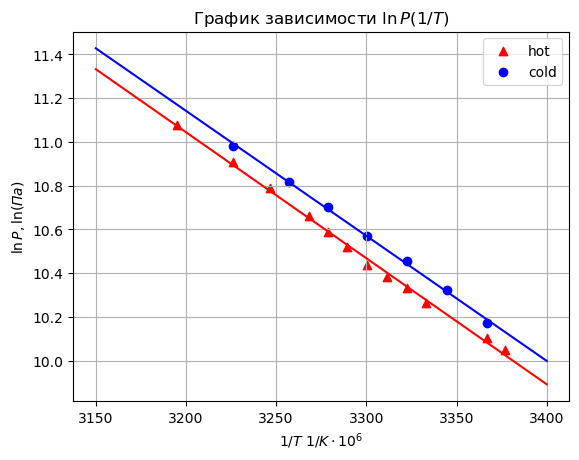

In [121]:
fig, ax = plt.subplots()
#ax.plot(xh, yh, 'r^-')
#plt.errorbar(xh, yh, yerr=dyh, xerr=dxh, fmt='-', ecolor='red')
plt.scatter(xh, yh, color="red", marker='^')

#ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")
ax.set_title('График зависимости $\ln P (1/T)$')
plt.grid()


model1 = np.poly1d(np.polyfit(xh, yh, 1))
polyline = np.linspace(3150, 3400)
plt.plot(polyline, model1(polyline), color = 'red')

model2 = np.poly1d(np.polyfit(xc, yc, 1))
plt.plot(polyline, model2(polyline), color = 'blue')


plt.xlabel('$1/T$ $1/K \cdot 10^6$')
plt.ylabel('$\ln P, \ln(Па)$')

plt.legend (('hot', 'cold'))

print("mhot = ", model1)
print("mcold = ", model2)

plt.show()
#plt.savefig('complexplot.png')

In [110]:
Lhot = R * 0.005758 * 10**6
Lcold  = R * 0.005712 * 10**6
Lhot, Lcold

(47848.98, 47466.72)

In [107]:
5758 * R

47848.98